In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from  scipy.stats import norm,lognorm
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


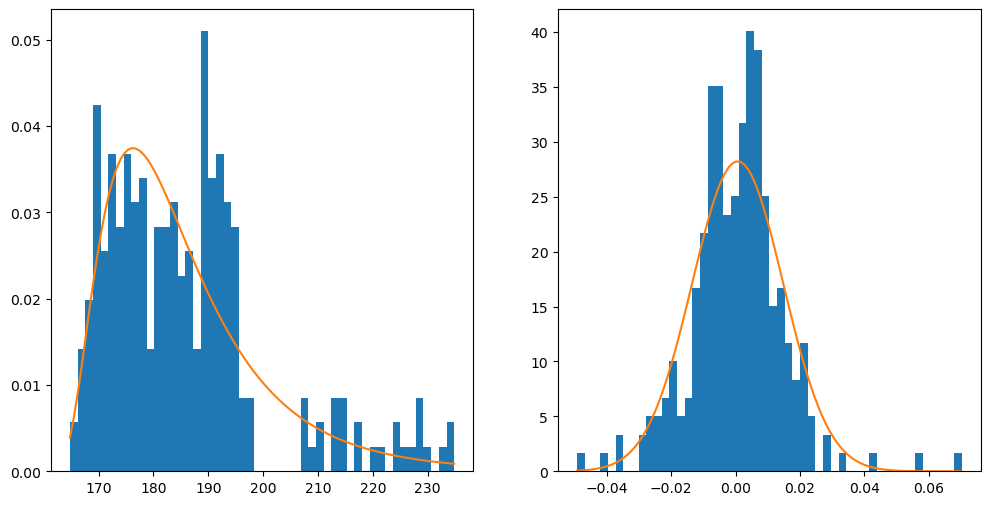

In [21]:
data = yf.download(tickers='AAPL',period='1y')
prices = data['Adj Close'].dropna()
data['Log Returns'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
log_returns = data['Log Returns'].dropna()


shape,loc,scale = lognorm.fit(prices)
x = np.linspace(min(prices),max(prices),100)
pdf_lognorm = lognorm.pdf(x,shape,loc,scale)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(prices,bins=50,density=True)
plt.plot(x,pdf_lognorm)




mu, sigma = norm.fit(log_returns)
x = np.linspace(min(log_returns),max(log_returns),100)
pdf_norm = norm.pdf(x,mu, sigma)
plt.subplot(1,2,2)
plt.hist(log_returns,bins=50,density=True)
plt.plot(x,pdf_norm)


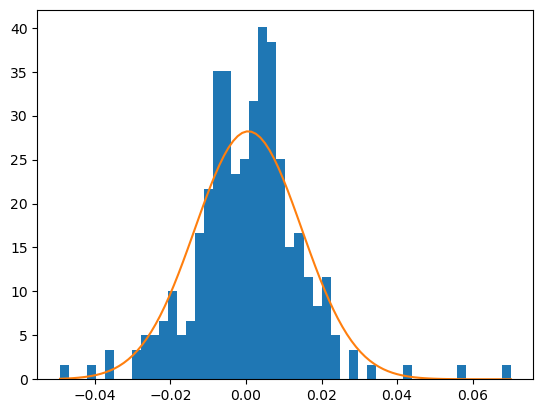